# <center>Dunnhumby - The Complete Journey<center>

** ** 
    
# <center>*05 - Clustering*<center>
    

In this notebook several Clustering Algorithms will be implemented.


<br>
    
This project was developed by <br><br>

*<center>António Oliveira | NTT Data Summer Internship 2024<center>*

** **

<a class="anchor" id="0"></a>

# Table of Contents

1. [Importing Libraries & Data](#1.-Importing-Libraries-&-Data)

    1.1 [Libraries](#1.1-Libraries)
    
    1.2 [Data](#1.2-Data) <br><br>
    
2. [K-Means](#2.-K-Means) <br><br>
    
3. [Hierarchical Clustering](#3.-Hierarchical-Clustering) <br><br>

4. [DB Scan](#4.-DB-Scan) <br><br>

5. [UMAP](#5.-UMAP) <br>

    5.1 [UMAP into DB Scan](#5.1-UMAP-into-DB-Scan) <br><br>

6. [Export](#6.-Export)

## 1. Import Libraries & Data

### 1.1 Libraries

In [30]:
import pandas as pd
import numpy as np


# scalers
from sklearn.preprocessing import StandardScaler


# cluster
from sklearn.cluster import DBSCAN, MeanShift, KMeans, AgglomerativeClustering, estimate_bandwidth

from sklearn.metrics import confusion_matrix

# UMAP
#!pip install umap-learn
import umap


import matplotlib.pyplot as plt

import functions

pd.set_option('display.max_columns', None)

### 1.2 Data

In [31]:
#path = '/Users/antoniooliveira/Downloads/NTT project/Clustering'
path = "C:/Users/aprataso/Downloads/final_data/Clustering"

customer_info = pd.read_csv(f'{path}/customer_info_treated.csv')
customer_info = customer_info.set_index('household_key')
customer_info.head(2)

,retail_disc,coupon_disc,coupon_match_disc,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,PRODUCE_spend,DRUG GM_spend,SALAD BAR_spend,NUTRITION_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,POSTAL CENTER_spend,DELI/SNACK BAR_spend,Photo/Video_spend,CHARITABLE CONT_spend,RX_spend,VIDEO RENTAL_spend,PROD-WHS SALES_spend,PHARMACY SUPPLY_spend,TOYS_spend,HBC_spend,ELECT &PLUMBING_spend,HOUSEWARES_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,-0.404,-0.047,-0.015,2021-02-20,0,Homeowner,married,senior,2.000,0.000,65.000,42000.000,0.000,2.000,2948.520,226.990,373.560,102.010,284.760,568.230,44.090,51.740,21.400,4.470,8.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1997,4634.320,12
2,-0.469,-0.013,0.000,2021-04-13,1,Probable Owner,single,young adult,1.000,0.000,21.500,25000.000,0.000,1.000,1190.580,50.010,238.860,26.550,162.930,353.110,0.000,7.990,4.560,0.000,23.530,9.620,23.620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,834,2091.360,11


In [32]:
pd.set_option('display.float_format', '{:.3f}'.format)
customer_info.describe().T

,count,mean,std,min,25%,50%,75%,max
retail_disc,2500.000,-0.560,0.279,-4.752,-0.637,-0.504,-0.411,-0.036
coupon_disc,2500.000,-0.014,0.028,-0.421,-0.015,-0.005,0.000,0.000
coupon_match_disc,2500.000,-0.002,0.006,-0.102,-0.002,-0.000,0.000,0.000
marital_status_code,2500.000,0.989,0.852,0.000,0.000,1.000,2.000,2.000
adult_category_size,2500.000,1.447,0.497,1.000,1.000,1.000,2.000,2.000
has_kids,2500.000,0.338,0.473,0.000,0.000,0.000,1.000,1.000
avg_age,2500.000,39.913,14.452,21.500,29.500,39.500,49.500,65.000
avg_income,2500.000,78072.000,66852.827,15000.000,29500.000,62000.000,112000.000,250000.000
n_kids,2500.000,0.443,0.706,0.000,0.000,0.000,1.000,3.000
n_household,2500.000,1.954,1.048,1.000,1.000,2.000,3.000,5.000


Since our data is very sparse, Spend columns with maximum values bellow 10 will be dropped

In [33]:
customer_info = customer_info.drop(['HOUSEWARES_spend', 'ELECT &PLUMBING_spend', 'HBC_spend', 'TOYS_spend',
                                    'PHARMACY SUPPLY_spend', 'PROD-WHS SALES_spend', 'CHARITABLE CONT_spend',
                                    'POSTAL CENTER_spend', 'coupon_disc', 'coupon_match_disc', 'retail_disc'], axis = 1)

Creating a Dataframe that only contains numerical columns

In [34]:
info_numeric = customer_info.loc[:, ~customer_info.columns.isin(
    ['homeowner_desc', 'marital_status', 'age_group',
     'first_transaction_date'])]

Verifying if *info_numeric* only contains numeric data types

In [35]:
info_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2500 entries, 1 to 2500
Data columns (total 38 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   marital_status_code    2500 non-null   int64  
 1   adult_category_size    2500 non-null   float64
 2   has_kids               2500 non-null   float64
 3   avg_age                2500 non-null   float64
 4   avg_income             2500 non-null   float64
 5   n_kids                 2500 non-null   float64
 6   n_household            2500 non-null   float64
 7   Groceries_spend        2500 non-null   float64
 8   Delicacies_spend       2500 non-null   float64
 9   Meat_spend             2500 non-null   float64
 10  Bakery_spend           2500 non-null   float64
 11  PRODUCE_spend          2500 non-null   float64
 12  DRUG GM_spend          2500 non-null   float64
 13  SALAD BAR_spend        2500 non-null   float64
 14  NUTRITION_spend        2500 non-null   float64
 15  MISC SALE

Since the ranges of each column are very different, it is necessary to scale the data

In [36]:
scaled_info = StandardScaler().fit_transform(info_numeric)

## 2. K-Means

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [37]:
dispersion = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_info)
    dispersion.append(kmeans.inertia_)

**Elbow Method**

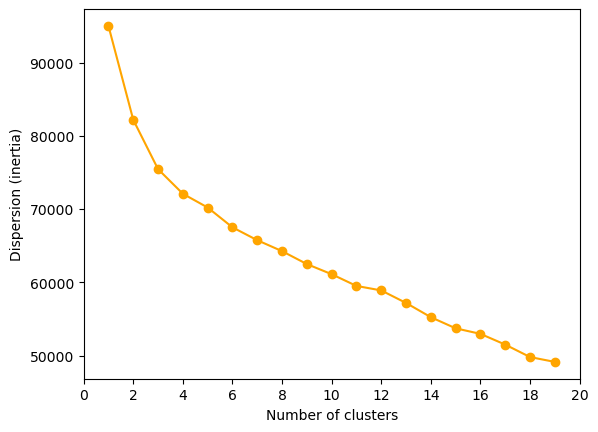

In [38]:
plt.plot(range(1, 20), dispersion, marker='o', color='orange')
plt.xlabel('Number of clusters')
plt.ylabel('Dispersion (inertia)')
plt.xticks(np.arange(0, 21, step=2))  
#plt.vlines(7, 5000, 600000, color='red')

plt.show()

Applying **K-Means** with N clusters

In [39]:
kmeans = KMeans(n_clusters=4, random_state=42)

info_numeric['cluster_kmeans'] = kmeans.fit_predict(scaled_info)
cluster_labels =  kmeans.fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_4416\1617410276.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_kmeans'] = kmeans.fit_predict(scaled_info)


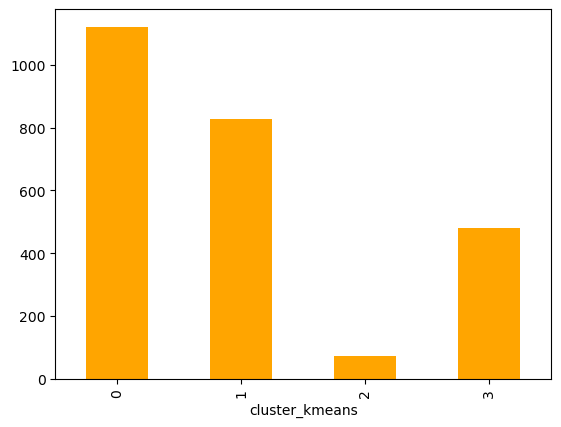

In [40]:
info_numeric.groupby(['cluster_kmeans']).size().plot(kind='bar', color='orange')
plt.show()

In [41]:
pd.set_option('display.float_format', '{:.3f}'.format)

info_numeric.groupby(['cluster_kmeans']).mean().T

#   'A': 0, married
#   'B': 1, single
#   'U': 2 unknown
#     'Single Male': 0,
#     'Single Female': 1,
#     '2 Adults No Kids': 2,
#     '2 Adults Kids': 2

# 0 - couples w/ kids
# 1 - single females
# 2 - elderly, high income
# 3 - young singles w/o kids
# 4 - high spend on GAS

cluster_kmeans,0,1,2,3
marital_status_code,1.372,0.428,0.653,1.111
adult_category_size,1.038,1.958,1.764,1.474
has_kids,0.141,0.672,0.444,0.207
avg_age,36.927,42.227,43.042,42.444
avg_income,60730.392,102023.579,117444.444,71421.712
n_kids,0.142,0.898,0.806,0.307
n_household,1.225,2.878,2.708,1.950
Groceries_spend,971.590,1149.086,7199.450,3806.010
Delicacies_spend,52.913,65.961,610.619,253.311
Meat_spend,231.612,282.054,1525.347,888.744


## 3. Hierarchical Clustering

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

Using Agglomerative Hierarchical Clustering with *Ward* Linkage

In [19]:
agg_clust = AgglomerativeClustering(
    linkage='ward', distance_threshold=0, n_clusters=None
    ).fit(scaled_info)

**Dendrogram**

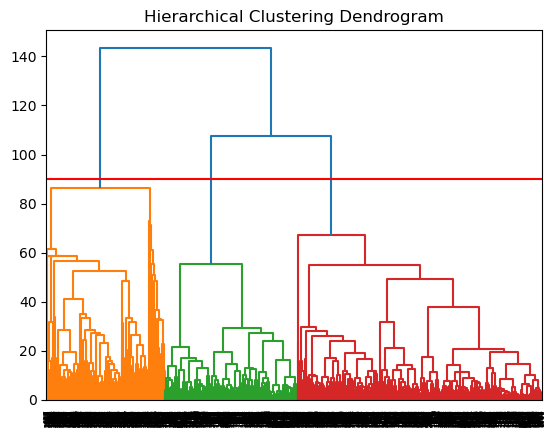

In [26]:
fig, ax = plt.subplots()
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
functions.plot_dendrogram(agg_clust, truncate_mode="level", p=50)
plt.axhline(y = 90, color = 'r', linestyle = '-')

plt.show()

In [27]:
info_numeric['cluster_ward'] = AgglomerativeClustering(
    linkage='ward', n_clusters=4
    ).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_4416\2294577397.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_ward'] = AgglomerativeClustering(


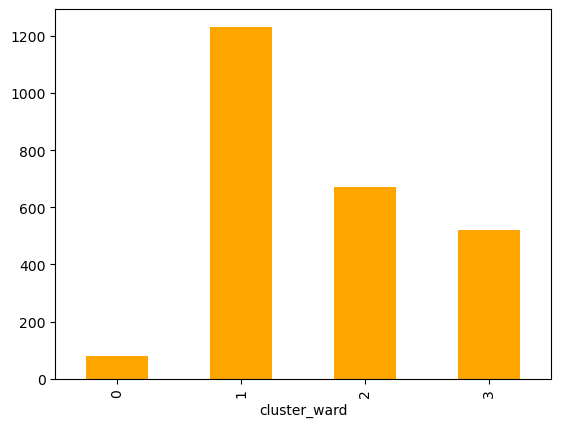

In [28]:
info_numeric.groupby(['cluster_ward']).size().plot(kind='bar', color='orange')
plt.show()

In [29]:
info_numeric.groupby(['cluster_ward']).mean().T

cluster_ward,0,1,2,3
marital_status_code,0.684,1.338,0.394,0.975
adult_category_size,1.709,1.032,2.000,1.678
has_kids,0.418,0.160,0.651,0.345
avg_age,42.038,37.997,41.257,42.404
avg_income,110462.025,62713.068,102689.552,77820.809
n_kids,0.899,0.165,0.881,0.468
n_household,2.747,1.270,2.882,2.256
Groceries_spend,6471.728,1176.774,1001.068,3372.043
Delicacies_spend,524.313,67.110,57.033,225.254
Meat_spend,1353.810,285.205,249.616,776.675


## 4. DB Scan

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [20]:
info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)

C:\Users\aprataso\AppData\Local\Temp\ipykernel_8536\2362419876.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_dbscan'] = DBSCAN(eps=10, min_samples = 40).fit_predict(scaled_info)


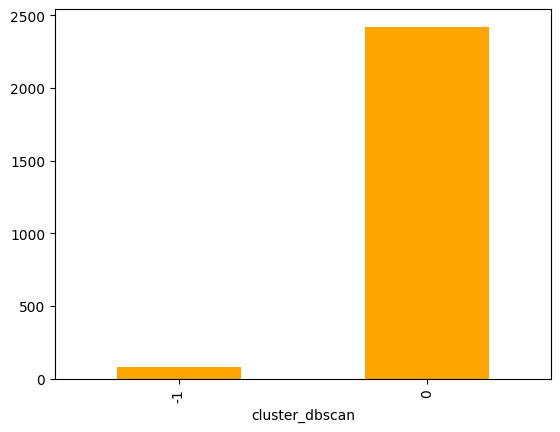

In [21]:
info_numeric.groupby(['cluster_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [22]:
info_numeric.groupby(['cluster_dbscan']).mean().T

cluster_dbscan,-1,0
household_key,1391.316,1245.905
retail_disc,-0.551,-0.560
coupon_disc,-0.030,-0.013
coupon_match_disc,-0.004,-0.002
marital_status_code,0.924,0.991
adult_category_size,1.570,1.443
has_kids,0.342,0.338
avg_age,39.804,39.917
avg_income,91126.582,77646.014
n_kids,0.595,0.438


## 5. UMAP

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [26]:
umap_object = umap.UMAP(n_neighbors=20, min_dist=0.1, n_components=2, random_state=42)

# n_neighbours - neighbours to consider; lower values --> more local structure
# min_dist - min_dist between neighbours; low values --> tighter groups
# n_components - dimensions of the output


In [27]:
X_sample = info_numeric.sort_index()

In [28]:
umap_embedding = umap_object.fit_transform(X_sample)

/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/Users/antoniooliveira/anaconda3/envs/Text_Mining/lib/python3.10/site-packages/umap/umap_.py:1945: Use

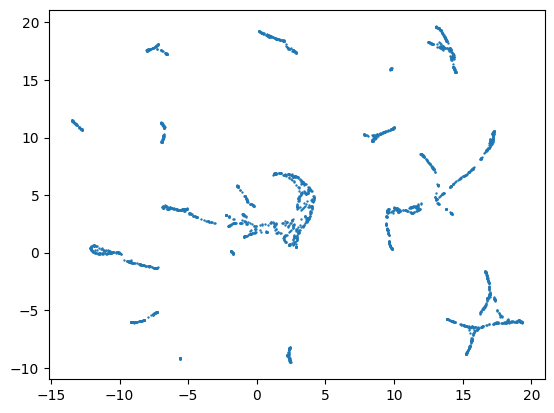

In [29]:
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1],s=0.5)

### 5.1 UMAP into DB Scan

In [60]:
clusterable_embedding = umap.UMAP(n_neighbors=50, min_dist=0.1, 
                                  n_components=2, random_state=42).fit_transform(X_sample)

c:\Users\aprataso\AppData\Local\anaconda3\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


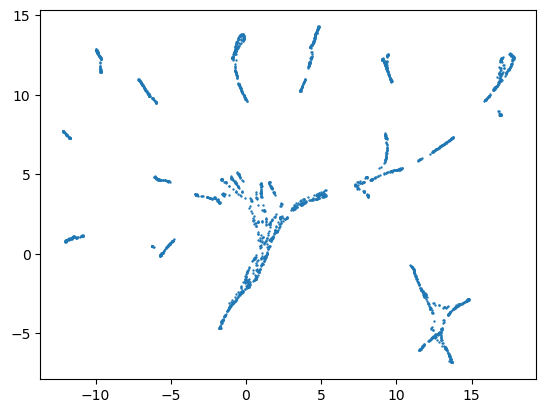

In [61]:
plt.scatter(clusterable_embedding[:, 0], clusterable_embedding[:, 1],s=0.5)

In [62]:
labels = DBSCAN(eps=2, min_samples=20).fit_predict(clusterable_embedding)

In [63]:
info_numeric['cluster_umap_dbscan'] = labels

C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\242391019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  info_numeric['cluster_umap_dbscan'] = labels


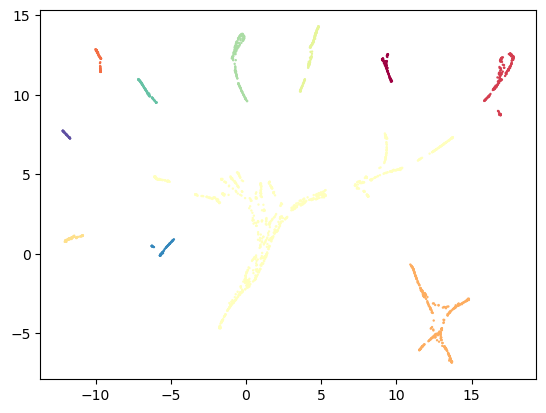

In [64]:
clustered = (labels >= 0) 
# Plotting points not belonging to any cluster in gray (outliers)
plt.scatter(clusterable_embedding[~clustered, 0],
            clusterable_embedding[~clustered, 1],
            color=(0.5, 0.5, 0.5),
            s=0.3,
            alpha=0.5)

# Plotting points belonging to each cluster
plt.scatter(clusterable_embedding[clustered, 0],
            clusterable_embedding[clustered, 1],
            c=labels[clustered],
            s=0.5,
            cmap='Spectral');

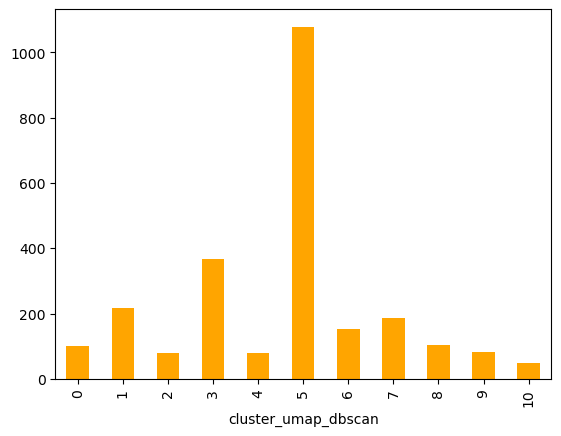

In [65]:
info_numeric.groupby(['cluster_umap_dbscan']).size().plot(kind='bar', color='orange')
plt.show()

In [66]:
info_numeric.groupby(['cluster_umap_dbscan']).mean().T

#0
#1 - pobres
#2 - w/ kids
#5 - love groceries, mt quantidade
#9 - 
#10 - ricos

cluster_umap_dbscan,0,1,2,3,4,5,6,7,8,9,10
household_key,1316.892,1722.794,884.737,936.703,1223.025,1318.758,1135.286,1304.112,890.291,1482.012,1032.820
retail_disc,-0.501,-0.549,-0.525,-0.556,-0.615,-0.563,-0.537,-0.586,-0.585,-0.556,-0.577
marital_status_code,1.108,0.927,0.863,1.174,0.823,0.944,1.214,0.824,0.961,1.110,0.860
adult_category_size,1.441,1.353,1.562,1.215,1.468,1.515,1.429,1.524,1.350,1.524,1.720
has_kids,0.206,0.367,0.512,0.213,0.544,0.328,0.305,0.433,0.456,0.354,0.480
avg_age,49.054,31.757,43.569,31.139,46.310,40.168,44.062,38.246,51.617,55.799,43.080
avg_income,42000.000,29004.587,137000.000,16459.128,162000.000,84147.032,62000.000,87000.000,112000.000,188853.659,224500.000
n_kids,0.314,0.367,0.750,0.262,0.595,0.455,0.429,0.561,0.612,0.427,0.660
n_household,1.882,1.766,2.312,1.534,2.063,2.055,1.961,2.118,1.971,1.963,2.380
Groceries_spend,1743.400,1177.860,1377.358,1295.408,1235.678,2814.394,2342.037,1520.395,1261.918,1288.138,1012.515


## 6. Export

<a class='anchor' id='1'></a>
[Top &#129033;](#0) 

In [45]:
# Create DataFrame for cluster labels
cluster_df = pd.DataFrame({'Cluster': cluster_labels}, index=info_numeric.index)

# Combine with non-numeric data
customer_info_f = pd.concat([customer_info, cluster_df], axis=1)
customer_info_f

,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,PRODUCE_spend,DRUG GM_spend,SALAD BAR_spend,NUTRITION_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,DELI/SNACK BAR_spend,Photo/Video_spend,RX_spend,VIDEO RENTAL_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count,Cluster
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2021-02-20,0,Homeowner,married,senior,2.000,0.000,65.000,42000.000,0.000,2.000,2948.520,226.990,373.560,102.010,284.760,568.230,44.090,51.740,21.400,4.470,8.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1997,4634.320,12,1
2,2021-04-13,1,Probable Owner,single,young adult,1.000,0.000,21.500,25000.000,0.000,1.000,1190.580,50.010,238.860,26.550,162.930,353.110,0.000,7.990,4.560,0.000,23.530,9.620,23.620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,834,2091.360,11,0
3,2021-04-23,0,Homeowner,married,middle-aged,2.000,1.000,49.500,137000.000,2.000,4.000,1909.790,39.020,608.900,3.520,72.800,170.160,1.460,0.000,0.000,0.000,0.000,10.680,1.340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1591,2817.670,10,1
4,2021-04-14,1,Renter,single,senior,1.000,0.000,65.000,19500.000,0.000,1.000,747.680,15.360,154.500,0.000,5.210,341.320,0.000,3.520,0.000,0.000,0.000,14.310,2.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2,382,1284.170,8,0
5,2021-03-26,0,Homeowner,married,senior,1.000,0.000,65.000,162000.000,0.000,1.000,384.290,85.670,129.240,2.550,2.350,217.320,0.000,2.140,0.000,0.000,0.000,0.000,10.140,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,245,833.700,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2021-04-27,0,Homeowner,married,middle-aged,2.000,0.000,49.500,87000.000,0.000,3.000,1990.930,105.820,1383.510,31.680,255.950,357.550,0.000,8.340,68.560,0.000,0.000,80.770,0.000,0.000,0.000,0.000,12.830,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1893,4297.630,12,1
2497,2021-03-19,2,Unknown,single,middle-aged,1.000,0.000,49.500,42000.000,0.000,1.000,4387.120,305.980,1052.900,69.070,747.630,748.280,6.190,18.490,15.390,0.000,34.200,65.190,25.330,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,2974,7475.770,14,3
2498,2021-04-15,2,Homeowner,unknown,adult,2.000,0.000,29.500,62000.000,0.000,2.000,1849.220,53.070,201.030,57.950,103.430,330.570,20.060,57.070,0.000,0.000,13.900,0.000,2.770,0.000,0.000,0.000,17.100,0.000,3.230,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,955,2709.400,12,1


In [46]:
customer_info_f

,first_transaction_date,marital_status_code,homeowner_desc,marital_status,age_group,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,PRODUCE_spend,DRUG GM_spend,SALAD BAR_spend,NUTRITION_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,DELI/SNACK BAR_spend,Photo/Video_spend,RX_spend,VIDEO RENTAL_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count,Cluster
household_key,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2021-02-20,0,Homeowner,married,senior,2.000,0.000,65.000,42000.000,0.000,2.000,2948.520,226.990,373.560,102.010,284.760,568.230,44.090,51.740,21.400,4.470,8.550,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1997,4634.320,12,1
2,2021-04-13,1,Probable Owner,single,young adult,1.000,0.000,21.500,25000.000,0.000,1.000,1190.580,50.010,238.860,26.550,162.930,353.110,0.000,7.990,4.560,0.000,23.530,9.620,23.620,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1,834,2091.360,11,0
3,2021-04-23,0,Homeowner,married,middle-aged,2.000,1.000,49.500,137000.000,2.000,4.000,1909.790,39.020,608.900,3.520,72.800,170.160,1.460,0.000,0.000,0.000,0.000,10.680,1.340,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1591,2817.670,10,1
4,2021-04-14,1,Renter,single,senior,1.000,0.000,65.000,19500.000,0.000,1.000,747.680,15.360,154.500,0.000,5.210,341.320,0.000,3.520,0.000,0.000,0.000,14.310,2.270,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,2,382,1284.170,8,0
5,2021-03-26,0,Homeowner,married,senior,1.000,0.000,65.000,162000.000,0.000,1.000,384.290,85.670,129.240,2.550,2.350,217.320,0.000,2.140,0.000,0.000,0.000,0.000,10.140,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0,245,833.700,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2496,2021-04-27,0,Homeowner,married,middle-aged,2.000,0.000,49.500,87000.000,0.000,3.000,1990.930,105.820,1383.510,31.680,255.950,357.550,0.000,8.340,68.560,0.000,0.000,80.770,0.000,0.000,0.000,0.000,12.830,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,1893,4297.630,12,1
2497,2021-03-19,2,Unknown,single,middle-aged,1.000,0.000,49.500,42000.000,0.000,1.000,4387.120,305.980,1052.900,69.070,747.630,748.280,6.190,18.490,15.390,0.000,34.200,65.190,25.330,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,4,2974,7475.770,14,3
2498,2021-04-15,2,Homeowner,unknown,adult,2.000,0.000,29.500,62000.000,0.000,2.000,1849.220,53.070,201.030,57.950,103.430,330.570,20.060,57.070,0.000,0.000,13.900,0.000,2.770,0.000,0.000,0.000,17.100,0.000,3.230,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,0,955,2709.400,12,1


In [43]:
customer_info_f.to_csv(f'{path}/cluster_data_num.csv', index=False)

#### <center>Visualisations for Power BI <center>

In [46]:
info_numeric.describe()

,household_key,retail_disc,marital_status_code,adult_category_size,has_kids,avg_age,avg_income,n_kids,n_household,Groceries_spend,Delicacies_spend,Meat_spend,Bakery_spend,DRUG GM_spend,SALAD BAR_spend,MISC SALES TRAN_spend,RESTAURANT_spend,FLORAL_spend,Seafood_spend,COSMETICS_spend,KIOSK-GAS_spend,CHEF SHOPPE_spend,GARDEN CENTER_spend,MISC. TRANS._spend,SPIRITS_spend,AUTOMOTIVE_spend,TRAVEL & LEISUR_spend,CNTRL/STORE SUP_spend,COUP/STR & MFG_spend,GM MERCH EXP_spend,DELI/SNACK BAR_spend,Photo/Video_spend,RX_spend,VIDEO RENTAL_spend,gender,homeowner_code,total_quantity,total_sales_value,unique_dep_count,cluster_kmeans
count,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000,2500.000
mean,1250.500,-0.560,0.989,1.447,0.338,39.913,78072.000,0.443,1.954,2033.183,111.688,411.464,52.115,451.721,13.248,51.343,0.851,16.973,39.632,13.850,232.928,0.981,3.282,4.571,9.275,0.194,1.092,0.021,0.440,0.043,0.015,0.033,0.068,0.009,1.135,1.445,104274.249,3449.055,10.005,1.691
std,721.832,0.278,0.852,0.497,0.473,14.452,66852.827,0.706,1.048,2063.025,172.715,456.970,71.598,600.312,38.201,332.715,6.845,41.783,83.126,33.447,532.531,3.752,23.500,35.974,68.039,1.665,3.618,0.495,2.425,0.514,0.328,0.494,1.050,0.280,0.804,1.502,244456.076,3583.873,3.224,1.432
min,1.000,-4.752,0.000,1.000,0.000,21.500,15000.000,0.000,1.000,1.860,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,5.000,8.740,1.000,0.000
25%,625.750,-0.637,0.000,1.000,0.000,29.500,29500.000,0.000,1.000,616.980,13.088,92.433,8.852,96.268,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,770.000,1038.827,8.000,0.000
50%,1250.500,-0.504,1.000,1.000,0.000,39.500,62000.000,0.000,2.000,1377.490,49.230,261.750,27.795,240.665,0.000,2.130,0.000,0.000,12.820,1.060,21.400,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,11084.500,2309.105,10.000,1.000
75%,1875.250,-0.413,2.000,2.000,1.000,49.500,112000.000,1.000,3.000,2816.665,133.697,547.687,69.075,570.535,10.325,16.340,0.000,18.260,41.940,12.197,192.893,0.000,0.000,2.450,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,2.000,2.000,87640.000,4722.680,12.000,3.000
max,2500.000,-0.036,2.000,2.000,1.000,65.000,250000.000,3.000,5.000,16223.980,1935.010,3736.710,916.070,5934.370,675.230,11942.400,178.190,938.560,1821.180,566.110,8184.660,80.000,1002.260,1067.880,2827.090,36.020,68.770,21.400,50.450,12.890,13.580,14.970,22.350,11.220,2.000,4.000,4479917.000,41004.030,19.000,4.000


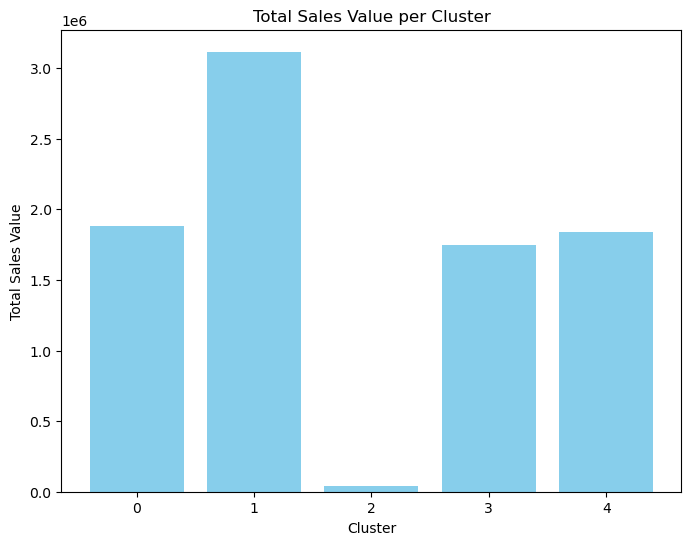

In [45]:
cluster_sales = info_numeric.groupby('cluster_kmeans')['total_sales_value'].sum().reset_index()

# Plot the results
plt.figure(figsize=(8, 6))
plt.bar(cluster_sales['cluster_kmeans'], cluster_sales['total_sales_value'], color='skyblue')
plt.xlabel('Cluster')
plt.ylabel('Total Sales Value')
plt.title('Total Sales Value per Cluster')
plt.xticks(cluster_sales['cluster_kmeans'])
plt.show()

In [50]:
import matplotlib.pyplot as plt

# Plot histogram for average income
plt.hist(df['avg_income'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Average Income')
plt.ylabel('Frequency')
plt.title('Histogram of Average Income')

# Save the plot as an image
plt.savefig(f'{path}/histogram_avg_income.png')
plt.close()  # Close the plot to free up memory

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data['avg_age'], bins=30, kde=True)
plt.title('Distribution of Average Age')
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\4062033630.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Average Age', data=avg_age_per_cluster, palette='viridis')


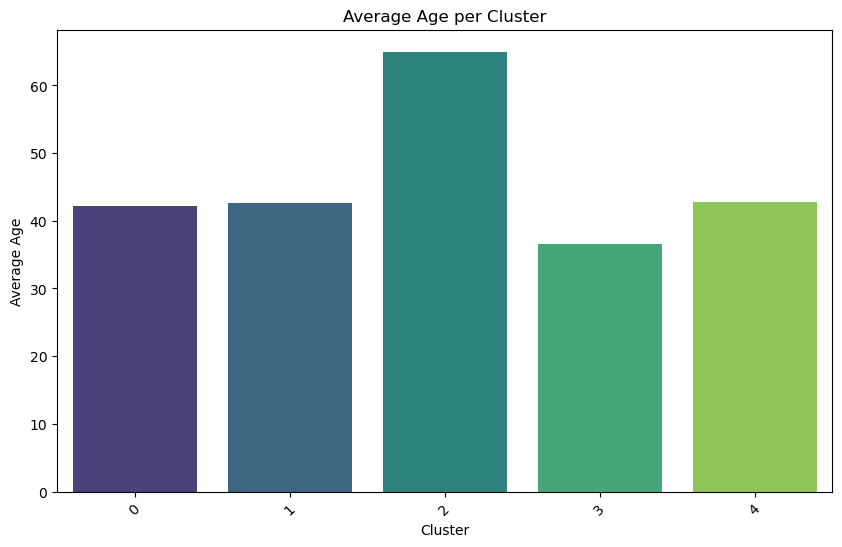

In [16]:

import matplotlib.pyplot as plt
import seaborn as sns

avg_age_per_cluster = info_numeric.groupby('cluster_kmeans')['avg_age'].mean().reset_index()

# Rename columns for better clarity
avg_age_per_cluster.columns = ['Cluster', 'Average Age']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Average Age', data=avg_age_per_cluster, palette='viridis')

# Customize the plot
plt.title('Average Age per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Age')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\3141342331.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='viridis')


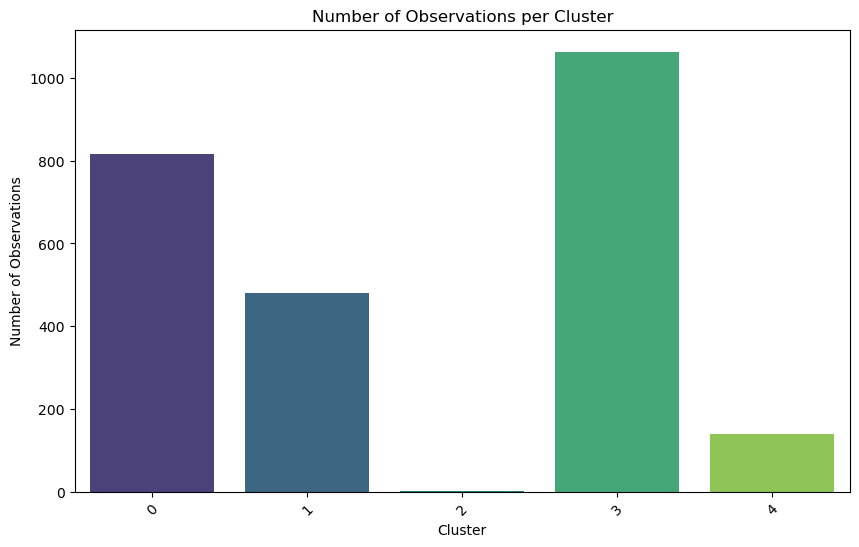

In [17]:
data = info_numeric

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

observations_per_cluster = data['cluster_kmeans'].value_counts().reset_index()

# Rename columns for clarity
observations_per_cluster.columns = ['Cluster', 'Number of Observations']

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='viridis')

# Customize the plot
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Show the plot
plt.show()


C:\Users\aprataso\AppData\Local\Temp\ipykernel_3644\2440611464.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='Set2')


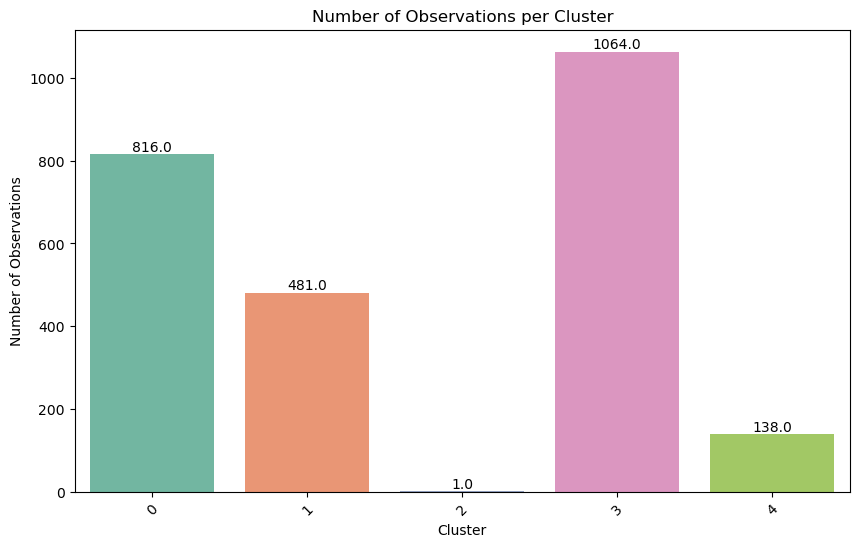

In [20]:
observations_per_cluster = data['cluster_kmeans'].value_counts().reset_index()
observations_per_cluster.columns = ['Cluster', 'Number of Observations']

# Create the bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Cluster', y='Number of Observations', data=observations_per_cluster, palette='Set2')

# Add annotations on top of each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Customize the plot
plt.title('Number of Observations per Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary

# Display the plot
plt.show()